# Event Detection from Time Series Data
 
Description: sensors data is somehow processed to generate a sequence of **events**, which is then mined for
interesting episodesspecified pattern to increase the computational efficiency of the mining process.

In [42]:
from nptdms import TdmsFile
from sklearn import preprocessing 
import pandas as pd
import numpy as np
#from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from collections import defaultdict
#from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seglearn as sgl
from matplotlib.mlab import PCA
import math


In [12]:
# load in data
tdms_file = TdmsFile(".\\FW-1-1\\new material\\AKF_SS-FW2-H04521-H05000.tdms")
#list out the groups
groups = tdms_file.groups() 
df = tdms_file.object('Untitled').as_dataframe()
df.columns

['Untitled']

In [15]:
s_fr = df['Stempel_1 (Formula Result)']

In [89]:
def Trend_Change(line,delta): 
    delta_new = abs(np.diff(line))
    max_d = np.max(delta_new)
    print(max_d)
    if max_d > delta:
        delta = delta_new
        k = np.where(delta_new > max_d/2)[0][0]+1
        return k
    else: return -1


190.79344000000037
1600.58124
2744.073720000044
647.766799999983
3836.482880000025
3672.087520000001
866.4706000000006
254.58820000000014
254.58820000000014
254.58820000000014
254.58820000000014
254.58820000000014


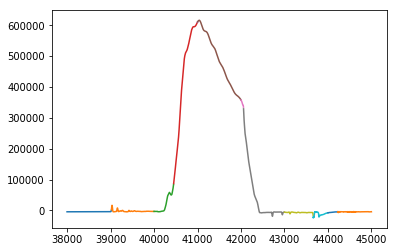

In [92]:
len_s = 50000#len(s_fr)
delta =  276
win_size = 1000
i = 38000
j = i;

while (i<len_s):
    k = Trend_Change(s_fr[j:i+win_size],delta)
    if (k != -1):
       s_fr[j:j+k].plot()
       s_fr[j+k+1:i+win_size].plot()
       j = i+win_size 
    i += win_size
   

In [72]:
line = s_fr[40800:41200]
delta = np.diff(line)
k = np.where(delta > abs(np.max(delta))/2)[0][0]+1
line[1:k].plot()
line[k+1:41000].plot()

TypeError: Empty 'DataFrame': no numeric data to plot

In [43]:
np.max(delta)

2744.073720000044

In [ ]:
def Find_Likelihood_Criteria()：
    